### 검증셋 추가

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('../../../../data/python_data/wine.csv',header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


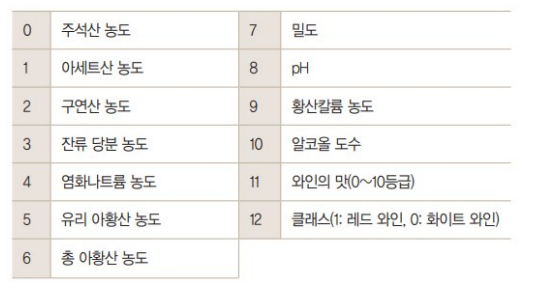

In [2]:
# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

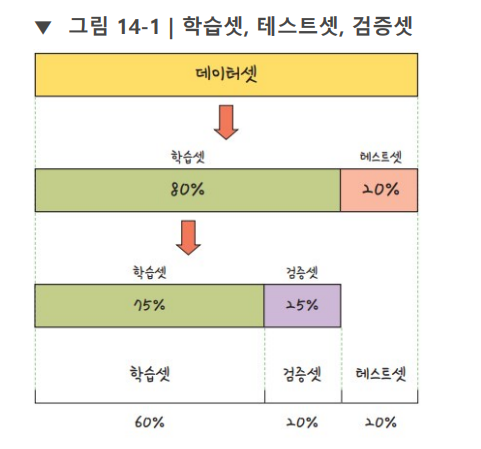

In [3]:
#학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델을 실행합니다.
# 검증 셋 생성 : validation_split
# 전체의 80%를 학습셋으로 만들고, 이 중 25%를 검증셋으로 하면
# 학습셋:검증셋:테스트셋 = 60:20:20
history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25) # 0.8 x 0.25 = 0.2

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                390       
                                                                 
 dense_1 (Dense)             (None, 12)                372       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875 (3.42 KB)
Trainable params: 875 (3.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
8/8 [==============================] - 1s 35ms/step - loss: 0.5309 - accuracy: 0.7311 - val_loss: 0.4441 - val_accuracy: 0.7554
Epoch 2/50
8/8 [===

In [4]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 2ms/step - loss: 0.1150 - accuracy: 0.9577
Test accuracy: 0.9576923251152039


## 모델 업데이트 하기
- epochs : 학습을 몇번 반복할 것인지 정해 줌
- 50이면 순전파와 역전파를 50번 실시한다는 뜻
- 학습을 많이 반복한다고 모델의 성능이 지속적으로 좋아지는 것은 아님

### 모델 저장 설정 및 실행
<br>
ModelCheckpoint() : 학습중인 모델을 저장하는 함수<br>
모델이 저장될 곳을 정하고 진행되는 현황을 모니터 할 수 있도록 verbose = 1(True)

In [5]:
# 모델 저장의 조건을 설정합니다.
# 50번째 에포크의 검증셋 정확도가 0.9346 => 50-0.9346.hdf5
# 모델명으로 몇번째 에포크의 정확도가 얼마다..를 확인함
modelpath="./model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

# 모델을 실행합니다. 
history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0, callbacks=[checkpointer])


Epoch 1: saving model to ./model/all\01-0.9577.hdf5

Epoch 2: saving model to ./model/all\02-0.9592.hdf5

Epoch 3: saving model to ./model/all\03-0.9585.hdf5


C:\Users\Playdata\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 4: saving model to ./model/all\04-0.9631.hdf5

Epoch 5: saving model to ./model/all\05-0.9654.hdf5

Epoch 6: saving model to ./model/all\06-0.9631.hdf5

Epoch 7: saving model to ./model/all\07-0.9623.hdf5

Epoch 8: saving model to ./model/all\08-0.9654.hdf5

Epoch 9: saving model to ./model/all\09-0.9646.hdf5

Epoch 10: saving model to ./model/all\10-0.9638.hdf5

Epoch 11: saving model to ./model/all\11-0.9654.hdf5

Epoch 12: saving model to ./model/all\12-0.9623.hdf5

Epoch 13: saving model to ./model/all\13-0.9669.hdf5

Epoch 14: saving model to ./model/all\14-0.9669.hdf5

Epoch 15: saving model to ./model/all\15-0.9654.hdf5

Epoch 16: saving model to ./model/all\16-0.9646.hdf5

Epoch 17: saving model to ./model/all\17-0.9654.hdf5

Epoch 18: saving model to ./model/all\18-0.9654.hdf5

Epoch 19: saving model to ./model/all\19-0.9669.hdf5

Epoch 20: saving model to ./model/all\20-0.9677.hdf5

Epoch 21: saving model to ./model/all\21-0.9662.hdf5

Epoch 22: saving model to ./model

In [6]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 2ms/step - loss: 0.0885 - accuracy: 0.9738
Test accuracy: 0.9738461375236511


- 학습의 반복 횟수가 너무 적으면 데이터셋의 패턴을 충분히 파악하지 못함
- 하지만 학습을 너무 많이 반복하는것도 좋지 않음(과적합)
- 적절한 학습 횟수를 정하기 위해서는 검증셋과 테스트셋의 결과를 그래프로 보는 것이 가장 좋음

## 그래프로 과적합 확인하기

In [7]:
# 에포크 2000으로 오랜 학습을 진행해봄(좀 오래 걸림)
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, verbose=0, validation_split=0.25)

In [8]:
hist_df=pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.082025,0.973826,0.084864,0.972308
1,0.081125,0.974852,0.082499,0.972308
2,0.080664,0.975366,0.081825,0.973077
3,0.080492,0.976392,0.079781,0.973077
4,0.077807,0.976649,0.086350,0.971538
...,...,...,...,...
1995,0.028629,0.991019,0.054392,0.987692
1996,0.027010,0.992045,0.056082,0.986154
1997,0.028633,0.991789,0.053367,0.989231
1998,0.029497,0.991019,0.053599,0.988462


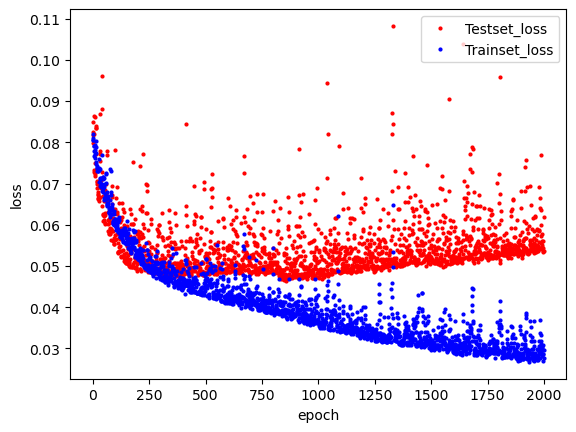

In [9]:
# y_vloss에 테스트셋(여기서는 검증셋)의 오차를 저장합니다.
y_vloss=hist_df['val_loss']

# y_loss에 학습셋의 오차를 저장합니다.
y_loss=hist_df['loss']

# x 값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시합니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

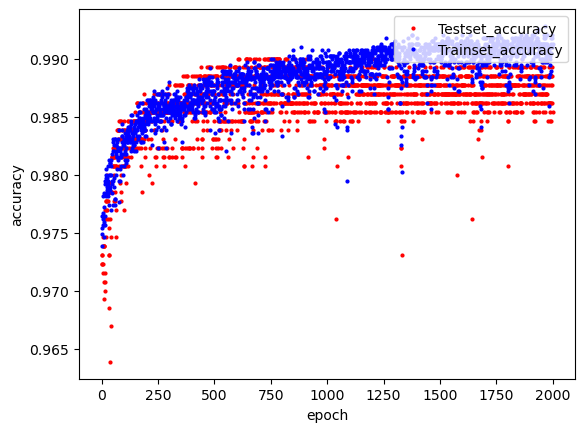

In [11]:
# y_vloss에 테스트셋(여기서는 검증셋)의 오차를 저장합니다.
y_vloss=hist_df['val_accuracy']

# y_loss에 학습셋의 오차를 저장합니다.
y_loss=hist_df['accuracy']

# x 값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시합니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_accuracy')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_accuracy')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

## 학습의 자동 중단
학습이 진행되어도 테스트셋 오차가 줄어들지 않으면 학습을 자동으로 멈추게 하는 것


In [13]:
# 전체 코드
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os
import pandas as pd

#학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                390       
                                                                 
 dense_5 (Dense)             (None, 12)                372       
                                                                 
 dense_6 (Dense)             (None, 8)                 104       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875 (3.42 KB)
Trainable params: 875 (3.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 학습의 자동중단 및 최적화 모델만 저장하기

In [15]:
# 학습이 언제 자동 중단 될지를 설정합니다.
# 더이상 좋아지지 않는 20번째 모델을 저장하겠음
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

#최적화 모델이 저장될 폴더와 모델의 이름을 정합니다.
modelpath="./model/best/Ch14-4-bestmodel.hdf5"

# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

#모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=1, callbacks=[early_stopping_callback,checkpointer])


Epoch 1/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.0578 - accuracy: 0.9841 - val_loss: 0.0736 - val_accuracy: 0.9738
Epoch 2/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0541 - accuracy: 0.9838 - val_loss: 0.0740 - val_accuracy: 0.9738
Epoch 3/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0516 - accuracy: 0.9859 - val_loss: 0.0711 - val_accuracy: 0.9762
Epoch 4/2000
1/8 [==>...........................] - ETA: 0s - loss: 0.0688 - accuracy: 0.9760

C:\Users\Playdata\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 0s 8ms/step - loss: 0.0523 - accuracy: 0.9836 - val_loss: 0.0792 - val_accuracy: 0.9731
Epoch 5/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0535 - accuracy: 0.9849 - val_loss: 0.0745 - val_accuracy: 0.9746
Epoch 6/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0527 - accuracy: 0.9833 - val_loss: 0.0759 - val_accuracy: 0.9738
Epoch 7/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0557 - accuracy: 0.9833 - val_loss: 0.0773 - val_accuracy: 0.9746
Epoch 8/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0531 - accuracy: 0.9831 - val_loss: 0.0755 - val_accuracy: 0.9723
Epoch 9/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0526 - accuracy: 0.9841 - val_loss: 0.0726 - val_accuracy: 0.9762
Epoch 10/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0526 - accuracy: 0.9851 - val_loss: 0.0702 - val_accuracy: 0.9769
Epoch 11/2000
8/8 [============

8/8 [==============================] - 0s 10ms/step - loss: 0.0538 - accuracy: 0.9846 - val_loss: 0.0748 - val_accuracy: 0.9754
Epoch 63/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0553 - accuracy: 0.9818 - val_loss: 0.0727 - val_accuracy: 0.9746
Epoch 64/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0477 - accuracy: 0.9861 - val_loss: 0.0867 - val_accuracy: 0.9708
Epoch 65/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0539 - accuracy: 0.9841 - val_loss: 0.0717 - val_accuracy: 0.9754
Epoch 66/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0483 - accuracy: 0.9851 - val_loss: 0.0706 - val_accuracy: 0.9769
Epoch 67/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0482 - accuracy: 0.9869 - val_loss: 0.0696 - val_accuracy: 0.9777
Epoch 68/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.0462 - accuracy: 0.9864 - val_loss: 0.0669 - val_accuracy: 0.9769
Epoch 69/2000
8/8 [=====

In [16]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 2ms/step - loss: 0.0703 - accuracy: 0.9815
Test accuracy: 0.9815384745597839
